In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tt = sns.load_dataset('titanic')
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


age
pclass sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    object  
 1   age          891 non-null    float64 
 2   sibsp        891 non-null    int64   
 3   parch        891 non-null    int64   
 4   fare         891 non-null    float64 
 5   class        891 non-null    category
 6   adult_male   891 non-null    bool    
 7   alive        891 non-null    object  
 8   embark_town  889 non-null    object  
dtypes: bool(1), category(1), float64(2), int64(2), object(3)
memory usage: 50.7+ KB
None 

sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
adult_male     0
alive          0
embark_town    2
dtype: int64


,sex,age,sibsp,parch,fare,class,adult_male,alive,embark_town
0,male,22.00,1,0,7.2500,Third,True,no,Southampton
1,female,38.00,1,0,71.2833,First,False,yes,Cherbourg
2,female,26.00,0,0,7.9250,Third,False,yes,Southampton
3,female,35.00,1,0,53.1000,First,False,yes,Southampton
4,male,35.00,0,0,8.0500,Third,True,no,Southampton
...,...,...,...,...,...,...,...,...,...
886,male,27.00,0,0,13.0000,Second,True,no,Southampton
887,female,19.00,0,0,30.0000,First,False,yes,Southampton
888,female,21.75,1,2,23.4500,Third,False,no,Southampton
889,male,26.00,0,0,30.0000,First,True,yes,Cherbourg


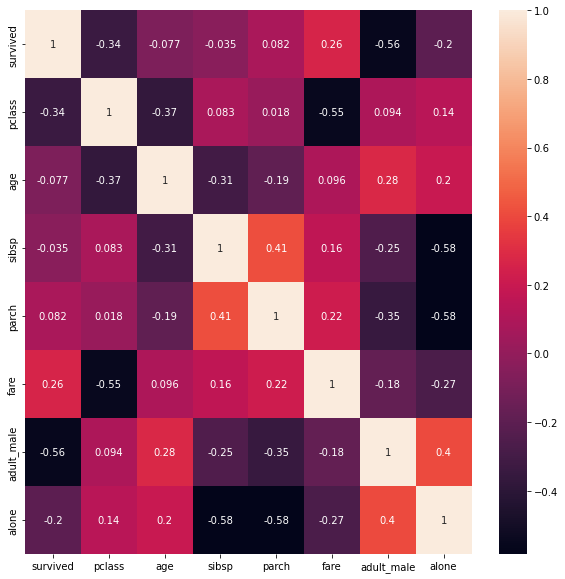

In [4]:
# 연령의 결측치를 채워줌

plt.figure(figsize = (10, 10))
sns.heatmap(tt.corr(), annot = True)
tt1 = tt.pivot_table(values = 'age', index = ['pclass', 'sex'], aggfunc = 'mean')
display(tt1)

def fill_age(x):
    if np.isnan(x['age']):
        return tt1.loc[x['pclass'], x['sex']]
    else:
        return x['age']
    
tt['age'] = tt.apply(fill_age, axis = 1).astype(float)

df = tt[['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'adult_male', 'alive', 'embark_town']]
print(df.info(), '\n')
print(df.isnull().sum())
df

In [28]:
# 생존자 기준 [성별, 나이, 클래스]

alive_yes = df[df['alive'] == 'yes'][['sex', 'age', 'class']]
alive_yes

,sex,age,class
1,female,38.0,First
2,female,26.0,Third
3,female,35.0,First
8,female,27.0,Third
9,female,14.0,Second
...,...,...,...
875,female,15.0,Third
879,female,56.0,First
880,female,25.0,Second
887,female,19.0,First


In [29]:
# 여성이 남성에 비해 압도적으로 생종률이 좋음

print(df.value_counts('sex'), '\n')
print(alive_yes.value_counts('sex'), '\n')
print(alive_yes[alive_yes['sex'] == 'male'], '\n')

print(f'남성 생존률 : {(109 / 577)}')
print(f'여성 생존률 : {(233 / 314)}')

sex
male      577
female    314
dtype: int64 

sex
female    233
male      109
dtype: int64 

      sex        age   class
17   male  30.740707  Second
21   male  34.000000  Second
23   male  28.000000   First
36   male  26.507589   Third
55   male  41.281386   First
..    ...        ...     ...
838  male  32.000000   Third
839  male  41.281386   First
857  male  51.000000   First
869  male   4.000000   Third
889  male  26.000000   First

[109 rows x 3 columns] 

남성 생존률 : 0.18890814558058924
여성 생존률 : 0.7420382165605095


sibsp  alive
0      no       398
       yes      210
1      yes      112
       no        97
2      no        15
4      no        15
2      yes       13
3      no        12
8      no         7
5      no         5
3      yes        4
4      yes        3
dtype: int64 

parch  alive
0      no       445
       yes      233
1      yes       65
       no        53
2      no        40
       yes       40
4      no         4
5      no         4
3      yes        3
       no         2
5      yes        1
6      no         1
dtype: int64 



alive                no         yes
sibsp count  549.000000  342.000000
      mean     0.553734    0.473684
      std      1.288399    0.708688
      min      0.000000    0.000000
      10%      0.000000    0.000000
      20%      0.000000    0.000000
      30%      0.000000    0.000000
      40%      0.000000    0.000000
      50%      0.000000    0.000000
      60%      0.000000    0.000000
      70%      0.000000    1.000000
      80%      1.000000    1.000000
      90%      1.000000    1.000000
      max      8.000000    4.000000
parch count  549.000000  342.000000
      mean     0.329690    0.464912
      std      0.823166    0.771712
      min      0.000000    0.000000
      10%      0.000000    0.000000
      20%      0.000000    0.000000
      30%      0.000000    0.000000
      40%      0.000000    0.000000
      50%      0.000000    0.000000
      60%      0.000000    0.000000
      70%      0.000000    1.000000
      80%      0.000000    1.000000
      90%      1.000000    2.000000
      max      6.000000    5.000000

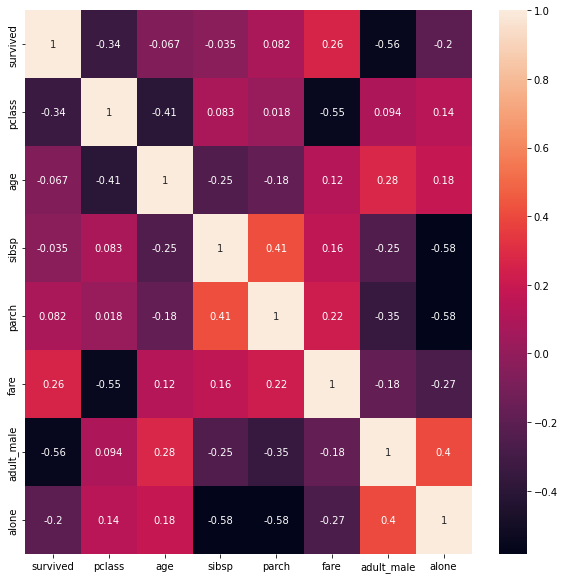

In [85]:
# 가족의 유무는 생존률에 큰 영향을 끼치지 못함

plt.figure(figsize = (10, 10))
sns.heatmap(tt.corr(), annot = True)

print(df.value_counts(['sibsp', 'alive']), '\n')
print(df.value_counts(['parch', 'alive']), '\n')
df[['sibsp', 'parch', 'alive']].groupby(['alive']).describe(percentiles = np.arange(1, 10) * 0.1).transpose()

In [38]:
grouped_sa = alive_yes.groupby(['sex', 'class'])
a = grouped_sa.describe(percentiles = np.arange(1, 10) * 0.1).round(2).transpose()
a

sex       female                 male              
class      First Second  Third  First Second  Third
age count  91.00  70.00  72.00  45.00  17.00  47.00
    mean   34.91  28.10  20.17  36.81  17.75  23.08
    std    12.54  12.58   9.97  14.15  18.93  10.50
    min    14.00   2.00   0.75   0.92   0.67   0.42
    10%    18.00   7.90   4.10  23.80   0.83   5.20
    20%    22.00  18.80  15.00  27.00   1.00  16.40
    30%    29.00  24.00  18.30  31.20   1.80  20.00
    40%    33.00  26.20  21.75  35.00   3.00  25.00
    50%    34.61  28.36  21.75  36.00   8.00  26.51
    60%    36.00  30.00  21.75  41.28  26.04  26.51
    70%    39.00  34.00  21.92  41.86  30.79  27.00
    80%    47.00  36.80  24.00  48.00  31.80  29.80
    90%    53.00  45.00  29.90  50.60  37.20  32.00
    max    63.00  55.00  63.00  80.00  62.00  45.00